<a href="https://colab.research.google.com/github/yoyadima/DA/blob/main/Sber_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [5]:
tr_mcc_codes = pd.read_csv('/content/drive/MyDrive/Python_And_Data_Analysis/data/tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('/content/drive/MyDrive/Python_And_Data_Analysis/data/tr_types.csv', sep=';')

In [6]:
transactions = pd.read_csv('/content/drive/MyDrive/Python_And_Data_Analysis/data/transactions.csv', nrows=1000000)
gender_train = pd.read_csv('/content/drive/MyDrive/Python_And_Data_Analysis/data/gender_train.csv')

In [7]:
tr_mcc_codes

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [8]:
tr_mcc_codes[tr_mcc_codes['mcc_description'].str.contains('Фл')]

,mcc_code,mcc_description
118,5992,Флористика


In [9]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
999995,98801178,269 10:29:06,5921,1010,-23016.59,127873
999996,98801178,270 10:26:45,5211,1010,-61380.88,10114209
999997,98801178,270 15:18:53,5921,1010,-11800.27,10105341
999998,98801178,271 12:47:13,5211,1010,-16170.59,10114209


In [10]:
gender_train

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1
...,...,...
8395,90417572,0
8396,66837341,0
8397,10758984,1
8398,11376556,0


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [11]:
trans_tr_mcc = transactions.merge(tr_mcc_codes, how='inner', on='mcc_code')
trans_tr_mcc_tr_types = trans_tr_mcc.merge(tr_types, how='inner', on='tr_type')
transactions_data = trans_tr_mcc_tr_types.merge(gender_train, how='left', on='customer_id')
transactions_data

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN


#### Task 1.

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [12]:
mean_f = transactions_data[(transactions_data['gender'] == 0) & (transactions_data['amount'] < 0)]['amount'].mean()
mean_f

-53376.91712217586

In [13]:
mean_m = transactions_data[(transactions_data['gender'] == 1) & (transactions_data['amount'] < 0)]['amount'].mean()
mean_m

-86094.97204239463

In [14]:
round(abs(mean_f - mean_m), 2)

32718.05

#### Task 2:

1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [15]:
data_task_2 = transactions_data.copy()
data_task_2['mcc_code+tr_type'] = data_task_2['mcc_code'].astype(str) + data_task_2['tr_type'].astype(str)
data_task_2 = data_task_2[data_task_2['amount'] < 0]
f = lambda x: len(x) >= 10
fff = data_task_2.groupby('mcc_code+tr_type').filter(f)
#fff.groupby('mcc_code+tr_type').var().max() - fff.groupby('mcc_code+tr_type').var().min()
#print((transactions_data.groupby('mcc_code+tr_type').size() >= 10).sum())
res = fff.groupby('mcc_code+tr_type')['amount'].agg([len, 'var'])
round(res['var'].max()/ res['var'].min())

9170599

In [16]:
df = transactions_data.copy()
df['mcc_code+tr_type'] = df.mcc_code.map(str) + df.tr_type.map(str)
df = df[['mcc_code+tr_type', 'amount']][df.amount < 0]
fltr = lambda group_df: len(group_df['amount']) >= 10
amount = (df.groupby('mcc_code+tr_type').filter(fltr) 
            .groupby('mcc_code+tr_type').var()).amount  
np.rint(amount.max() / amount.min()).astype(int)

9170599

#### Task 3:

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия +
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [17]:
data_task_3 = transactions_data.copy()
res = data_task_3.query('amount > 0 and gender == 0').groupby(['tr_type'])['amount'].agg([('max_income', 'max')])
res = res.sort_values(by=['max_income'], ascending=True)
res = res.head(5)
res

,max_income
tr_type,
4051,1122.96
4110,2245.92
4210,2245.92
2370,2335.75
4100,5041.86


In [18]:
res1 = data_task_3.query('amount > 0 and gender == 1').groupby(['tr_type'])['amount'].agg([('max_income', 'max')])
res1 = res1.sort_values(by=['max_income'], ascending=True)
res1 = res1.head(5)
res1

,max_income
tr_type,
4110,2245.92
2020,2245.92
1010,28803.87
8100,64682.37
6000,79280.83


In [19]:
res.merge(res1, on='tr_type', how='inner')

,max_income_x,max_income_y
tr_type,,
4110,2245.92,2245.92


In [20]:
transactions_data[transactions_data['tr_type'] == 4110]['tr_description'].unique()

array(['Плата за получение наличных в АТМ. Россия'], dtype=object)

#### Task 4:

1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины +
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин +
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских +
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [21]:
data_task_4 = transactions_data.copy()
data_task_4['tr_day'] = data_task_4['tr_datetime'].apply(lambda x: str(x).split()[0])
#984465
data_uniq_mcc_code = data_task_4.groupby(['tr_day'])['mcc_code'].agg([('uniq', 'nunique')])
data_task_4 = data_task_4[data_task_4['tr_day'].isin(data_uniq_mcc_code[data_uniq_mcc_code['uniq'] > 75].index)]

#pd.pivot_table(data_task_4, index=['mcc_code', 'gender'])
data_task_4.groupby(['mcc_code', 'mcc_description', 'gender'])['amount'].mean()

mcc_code  mcc_description                                                      gender
742       Ветеринарные услуги                                                  0.0       -31602.281000
                                                                               1.0       -42221.046667
1711      Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу  0.0      -674897.690000
                                                                               1.0       -15808.038571
1731      Подрядчики по электричеству                                          1.0       -55923.300000
                                                                                             ...      
9311      Налоговые платежи                                                    0.0       -56513.247500
                                                                               1.0       -23582.117143
9399      Правительственные услуги, нигде ранее не классифицируемые            0.0       -

In [22]:
data_task_4[(data_task_4['gender'] == 1) & (data_task_4['amount'] < 0)]['mcc_description'].value_counts()

Финансовые институты — снятие наличности автоматически                                                                                                        28089
Бакалейные магазины, супермаркеты                                                                                                                             23948
Звонки с использованием телефонов, считывающих магнитную ленту                                                                                                16917
Денежные переводы                                                                                                                                             12948
Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов     8331
                                                                                                                                                              ...  
Прямой маркетинг

In [23]:
data_task_4[(data_task_4['gender'] == 0) & (data_task_4['amount'] < 0)]['mcc_description'].value_counts()

Финансовые институты — снятие наличности автоматически                                                                                                        27971
Бакалейные магазины, супермаркеты                                                                                                                             25478
Звонки с использованием телефонов, считывающих магнитную ленту                                                                                                23969
Денежные переводы                                                                                                                                             14723
Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов     7798
                                                                                                                                                              ...  
Агентства по аре

In [24]:
data_task_4[data_task_4['mcc_description'] =='Автошины']['gender'].value_counts()

1.0    23
0.0     3
Name: gender, dtype: int64

In [25]:
mc = 'Салоты красоты и парикмахерские'
data_task_4[(data_task_4['mcc_description'] == mc) & (data_task_4['gender'] == 1)].shape[0] / data_task_4[(data_task_4['mcc_description'] == mc) & (data_task_4['gender'] == 0)].shape[0]

0.2894736842105263

In [26]:
tr_mcc_codes_gender_percentage = tr_mcc_codes.copy()
tr_mcc_codes_gender_percentage

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [27]:
def get_gender_percentage(mcc_in):
  male = data_task_4[(data_task_4['mcc_description'] == mcc_in) & (data_task_4['gender'] == 1)].shape[0]
  female = data_task_4[(data_task_4['mcc_description'] == mcc_in) & (data_task_4['gender'] == 0)].shape[0]
  if female == 0:
    return male / 1
  else:
    return male / female

In [28]:
tr_mcc_codes_gender_percentage['percentage'] = 0

tr_mcc_codes_gender_percentage['percentage'] = tr_mcc_codes_gender_percentage.apply(lambda row : get_gender_percentage(row['mcc_description']), axis = 1) 

In [29]:
mcc_to_drop = tr_mcc_codes_gender_percentage[(tr_mcc_codes_gender_percentage['percentage'] >= 0.85) & (tr_mcc_codes_gender_percentage['percentage'] <= 1.2)]
mcc_to_drop['mcc_code'].values

array([1731, 3351, 4121, 4511, 4829, 4900, 5047, 5192, 5200, 5309, 5311,
       5331, 5411, 5422, 5499, 5655, 5713, 5812, 5944, 5964, 5992, 5999,
       6011, 7216, 7273, 7299, 7375, 7399, 7523, 7699, 7932, 8244, 8641,
       9222, 9402])

In [30]:
tr_mcc_codes_gender_percentage = tr_mcc_codes_gender_percentage[((tr_mcc_codes_gender_percentage['percentage'] < 0.3) \
                                                                 | (tr_mcc_codes_gender_percentage['percentage'] > 3))]

In [31]:
tr_mcc_codes_gender_percentage['gender'] = 0
tr_mcc_codes_gender_percentage['gender'] = tr_mcc_codes_gender_percentage.apply(lambda x: 0 if x.percentage < 1.5 else 1, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
mas_mcc = tr_mcc_codes_gender_percentage[tr_mcc_codes_gender_percentage.gender == 1]['mcc_code'].values
#139992.0
mas_mcc

array([1711, 1799, 2741, 3501, 4131, 5013, 5065, 5072, 5074, 5193, 5199,
       5451, 5511, 5532, 5533, 5542, 5571, 5599, 5733, 5734, 5816, 5969,
       5970, 6010, 6051, 6211, 7338, 7372, 7512, 7538, 7542, 7841, 7995,
       9311, 9399])

In [33]:
data_task_4[data_task_4['mcc_code'].isin(mas_mcc)]['gender'].value_counts()

1.0    73937
0.0    21702
Name: gender, dtype: int64

In [34]:
data_task_4

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,tr_day
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,13
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,18
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,19
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,19
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,29
...,...,...,...,...,...,...,...,...,...,...
999576,9055616,270 23:37:21,3000,6000,570417.69,290594,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,0.0,270
999577,14937933,77 23:37:59,3000,6000,75687.36,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,77
999578,61463328,275 23:37:29,3000,6000,286601.31,290594,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,275
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,18


In [35]:
data_task_4[data_task_4['mcc_code'].isin(mas_mcc)]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,tr_day
121473,29481052,291 00:00:00,5533,1100,-34268.63,778343,Автозапчасти и аксессуары,Покупка. ТУ Россия,1.0,291
121474,29481052,335 00:00:00,5533,1100,-3887.68,778343,Автозапчасти и аксессуары,Покупка. ТУ Россия,1.0,335
121475,29481052,342 00:00:00,5533,1100,-32004.30,80298001,Автозапчасти и аксессуары,Покупка. ТУ Россия,1.0,342
121476,29481052,395 00:00:00,5533,1100,-24844.99,778343,Автозапчасти и аксессуары,Покупка. ТУ Россия,1.0,395
121477,97634522,388 00:00:00,5533,1100,-89387.45,80298001,Автозапчасти и аксессуары,Покупка. ТУ Россия,1.0,388
...,...,...,...,...,...,...,...,...,...,...
998324,20297899,393 00:00:00,7995,6210,11229.58,00000000,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,NaN,393
998325,20297899,395 00:00:00,7995,6210,101066.21,00000000,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,NaN,395
998326,5577042,228 00:00:00,7995,6210,8759.07,00000000,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,NaN,228
998327,24436367,86 00:00:00,7995,6210,63829.82,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,NaN,86


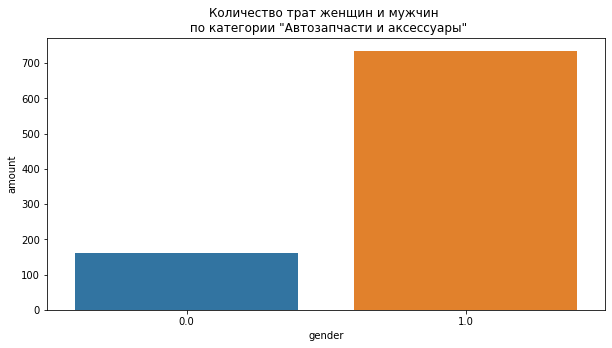

In [36]:
data_mcc_5533 = data_task_4[(data_task_4['mcc_description'] == 'Автозапчасти и аксессуары') & (data_task_4['amount'] < 0)].groupby('gender').count()
data_mcc_5533.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=data_mcc_5533, x='gender', y='amount').set_title('Количество трат женщин и мужчин \n по категории "Автозапчасти и аксессуары"');

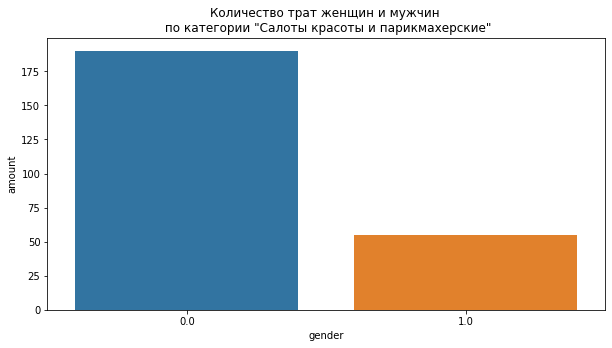

In [37]:
data_mcc_7230 = data_task_4[(data_task_4['mcc_description'] == 'Салоты красоты и парикмахерские') & (data_task_4['amount'] < 0)].groupby('gender').count()
data_mcc_7230.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=data_mcc_7230, x='gender', y='amount').set_title('Количество трат женщин и мужчин \n по категории "Салоты красоты и парикмахерские"');

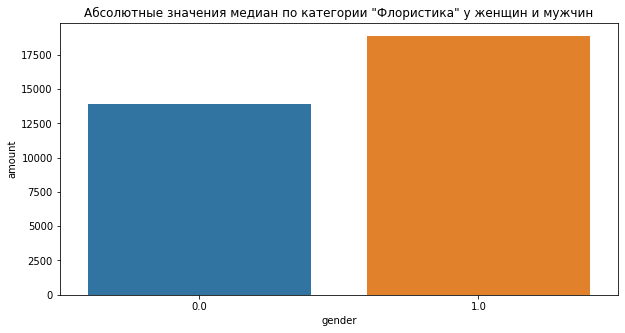

In [38]:
data_mcc_5992 = data_task_4[(data_task_4['mcc_description'] == 'Флористика')].groupby('gender')['amount'].median().abs()
data_mcc_5992 = data_mcc_5992.to_frame()
data_mcc_5992.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=data_mcc_5992, x='gender', y='amount').set_title('Абсолютные значения медиан по категории "Флористика" у женщин и мужчин');

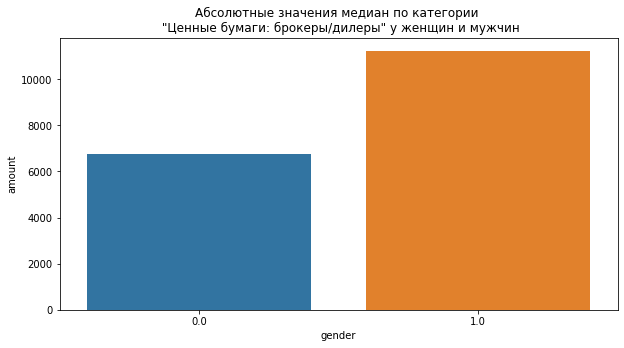

In [39]:
data_task_4[data_task_4['mcc_description'] == 'Ценные бумаги: брокеры/дилеры']

data_mcc_6211 = data_task_4[data_task_4['mcc_description'] == 'Ценные бумаги: брокеры/дилеры'].groupby('gender')['amount'].median().abs()
data_mcc_6211 = data_mcc_6211.to_frame()
data_mcc_6211.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=data_mcc_6211, x='gender', y='amount').set_title('Абсолютные значения медиан по категории \n "Ценные бумаги: брокеры/дилеры" у женщин и мужчин');

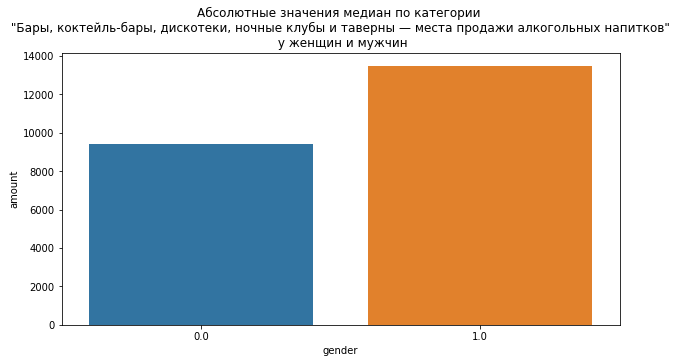

In [40]:
data_mcc_5813 = data_task_4[data_task_4['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков'].groupby('gender')['amount'].median().abs()
data_mcc_5813 = data_mcc_5813.to_frame()
data_mcc_5813.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=data_mcc_5813, x='gender', y='amount').set_title('Абсолютные значения медиан по категории \n "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" \n у женщин и мужчин');

### Task 5:

1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [41]:
data_task_5 = transactions_data.copy()
data_task_5['amount']

0           -2245.92
1           -5614.79
2           -1122.96
3           -2245.92
4           -2245.92
             ...    
999579    1297824.89
999580     124693.24
999581     218976.79
999582     408307.49
999583     204153.74
Name: amount, Length: 999584, dtype: float64

In [42]:
data_task_5.sort_values('amount', inplace=True)
data_task_5['amount_bucket'] = pd.qcut(data_task_5[data_task_5['amount'] < 0]['amount'].abs(), 5, labels=['Very Low', 'Low','Middle','High','Very High'])
data_task_5['amount_bucket'] = data_task_5['amount_bucket'].cat.add_categories('Income').fillna('Income') 
data_task_5

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,amount_bucket
746087,26782922,151 11:35:21,4829,2370,-1.459845e+08,NaN,Денежные переводы,Списание с карты на карту по операции <перевод...,1.0,Very High
733936,19950741,143 14:08:16,4829,2370,-1.347549e+08,NaN,Денежные переводы,Списание с карты на карту по операции <перевод...,1.0,Very High
735026,40917212,43 17:10:25,4829,2370,-6.737747e+07,NaN,Денежные переводы,Списание с карты на карту по операции <перевод...,0.0,Very High
763340,77695202,132 14:07:34,4829,2370,-6.094944e+07,NaN,Денежные переводы,Списание с карты на карту по операции <перевод...,0.0,Very High
733938,19950741,144 10:00:33,4829,2370,-5.176836e+07,NaN,Денежные переводы,Списание с карты на карту по операции <перевод...,1.0,Very High
...,...,...,...,...,...,...,...,...,...,...
923980,77695202,132 14:07:18,6010,7070,6.123489e+07,NaN,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через Мобильный бан...,0.0,Income
810165,40917212,43 17:10:40,6010,7070,6.737747e+07,NaN,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через Мобильный бан...,0.0,Income
799288,82581973,192 18:18:17,6010,7020,6.737747e+07,NaN,Финансовые институты — снятие наличности вручную,Взнос наличных через POS,NaN,Income
809240,19950741,143 14:08:24,6010,7070,1.347549e+08,NaN,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через Мобильный бан...,1.0,Income


In [43]:
data_task_5['tr_hour'] = data_task_5['tr_datetime'].apply(lambda x: (str(x).split()[1]).split(':')[0])

После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.

In [44]:
data_pivot = pd.pivot_table(data_task_5, values='gender', index='tr_hour', columns='amount_bucket')
data_pivot

amount_bucket,Very Low,Low,Middle,High,Very High,Income
tr_hour,,,,,,
00,0.518077,0.545985,0.529169,0.584530,0.573933,0.737148
01,0.450237,0.534704,0.600000,0.586207,0.591837,0.965922
02,0.349099,0.388128,0.511538,0.437276,0.539130,0.965834
03,0.284333,0.392749,0.403599,0.386091,0.548110,0.945011
04,0.289447,0.464474,0.404959,0.427002,0.525287,0.914473
05,0.374408,0.379579,0.444327,0.458654,0.524961,0.880842
06,0.365524,0.431141,0.416905,0.459900,0.525683,0.815352
07,0.412671,0.448400,0.476474,0.464253,0.523159,0.757958
08,0.432481,0.454677,0.456548,0.477457,0.562624,0.725043


In [45]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(15, 15))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

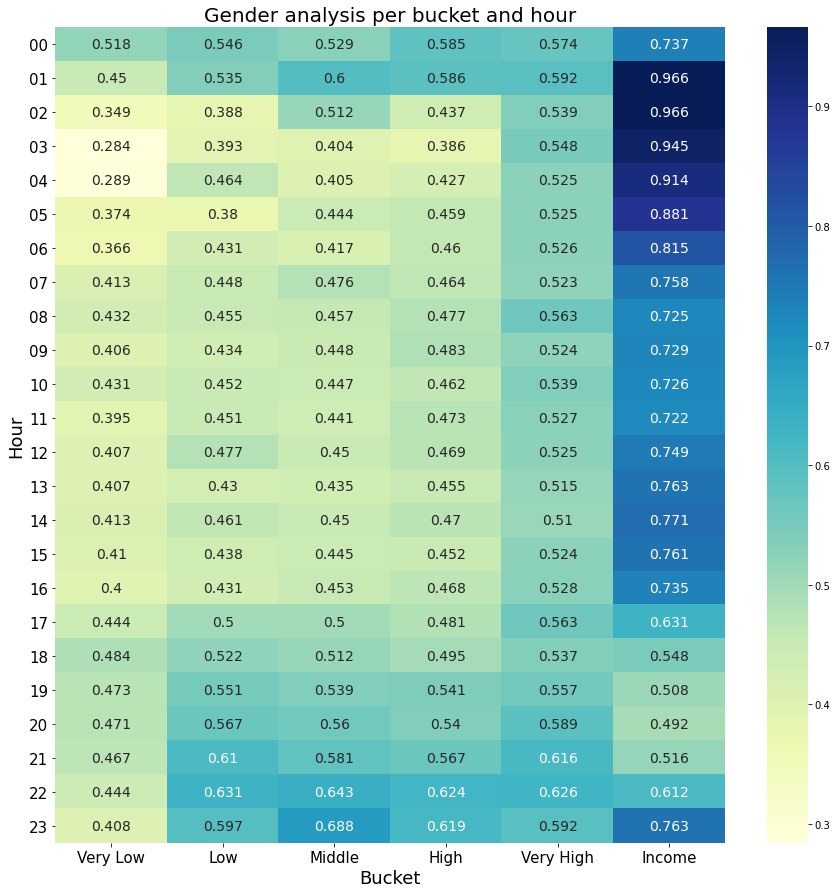

In [46]:
plot_pivot_table(data_pivot)

### Task 6:

1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами +
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения) +
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних +
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [47]:
data_task_5['tr_day'] = data_task_5['tr_datetime'].apply(lambda x: str(x).split()[0])
data_task_5['tr_day'] = data_task_5['tr_day'].astype(int)
mask = (data_task_5['mcc_code'].value_counts() > 60000).index
data_task_6 = data_task_5[data_task_5['mcc_code'].isin(mask)]
data_task_6_1 = data_task_6.groupby(['tr_day', 'mcc_code'])['amount'].mean()
data_task_6_1 = data_task_6_1.to_frame()
data_task_6_1

amount
tr_day mcc_code             
0      742       -12352.5400
       4112      -39979.5460
       4511     -261568.7800
       4722     -167311.5200
       4789       -8983.6600
...                      ...
456    7997     -137000.8600
       7999      -15811.2500
       8099      -27737.0600
       8999       -8434.6775
       9399        -663.6700

[35091 rows x 1 columns]

In [48]:
uniq_mcc = data_task_6[data_task_6['mcc_description'].str.contains('Финансовые институты', regex=True)]['mcc_code'].unique()
data_task_5[data_task_5['mcc_code'].isin(uniq_mcc)]['mcc_code'].value_counts() > 60000

6011     True
6010     True
6012    False
Name: mcc_code, dtype: bool

In [49]:
uniq_mcc = data_task_6[data_task_6['mcc_description'].str.contains('снятие наличности', regex=True)]['mcc_code'].unique()
data_task_6[data_task_6['mcc_code'].isin(uniq_mcc)].groupby('mcc_code')['amount'].sum()

mcc_code
6010    1.472534e+10
6011   -1.297048e+10
Name: amount, dtype: float64

mcc-код категории "Бакалейные магазины, супермаркеты": 5411



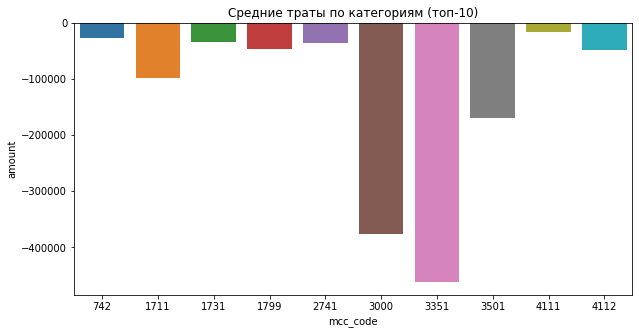

In [59]:
uniq_mcc = data_task_6[data_task_6['mcc_description'].str.contains('[Бб]акале', regex=True)]['mcc_code'].unique()
data_task_6_2 = data_task_6[data_task_6['amount'] < 0].groupby('mcc_code').mean()
data_task_6_2 = data_task_6_2['amount'].to_frame()
print('mcc-код категории "Бакалейные магазины, супермаркеты": {}'.format(uniq_mcc[0]))
print()

data_task_6_2.reset_index(inplace=True)
data_task_6_2.sort_values(by=['amount'], ascending=True)
plt.figure(figsize=(10, 5))
sns.barplot(data=data_task_6_2.head(10), x='mcc_code', y='amount').set_title('Средние траты по категориям (топ-10)');

In [78]:
data_task_6_3 = data_task_6[data_task_6['mcc_description'].str.contains('[Пп]ереводы', regex=True)]
data_task_6_3['mcc_description'].unique()

array(['Денежные переводы', 'Денежные переводы MasterCard MoneySend',
       'Не-финансовые институты — иностранная валюта, денежные переводы (непередаваемые), дорожные чеки, квази-кэш'],
      dtype=object)

In [ ]:
data_task_6_3['mcc_description'] = data_task_6_3['mcc_description'].replace(['Денежные переводы', 'Денежные переводы MasterCard MoneySend',\
       'Не-финансовые институты — иностранная валюта, денежные переводы (непередаваемые), дорожные чеки, квази-кэш'], [1, 2, 3])

In [81]:
data_task_6_3.groupby('mcc_description')['amount'].mean()

mcc_description
1   -199262.084633
2     63269.032371
3    -68674.367495
Name: amount, dtype: float64

In [67]:
data_task_5[data_task_5['amount'] < 0].groupby('mcc_code')['amount'].mean()

mcc_code
742    -26908.782963
1711   -97550.727222
1731   -34254.257500
1799   -45323.675789
2741   -35672.833750
            ...     
9211    -4491.830000
9222   -92212.478936
9311   -25174.828649
9399   -49722.896579
9402    -9825.136667
Name: amount, Length: 184, dtype: float64

In [66]:
#res = data_task_6.groupby(['tr_day', 'mcc_code'])['amount'].mean().unstack()
data_pivott = pd.pivot_table(data_task_6, values='amount', index='tr_day', columns='mcc_code')
data_pivott

mcc_code,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,4121,4131,4214,4215,4411,4511,4722,4784,4789,4812,4814,4816,4829,4899,4900,5013,5039,5044,5045,5047,5065,5072,5074,5085,5094,5099,5111,5122,5131,5137,...,7395,7399,7512,7523,7531,7538,7542,7629,7699,7829,7832,7841,7922,7932,7933,7991,7993,7994,7995,7996,7997,7999,8011,8021,8043,8062,8071,8099,8220,8244,8299,8398,8641,8699,8999,9211,9222,9311,9399,9402
tr_day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-12352.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39979.546000,NaN,NaN,NaN,NaN,NaN,-261568.780000,-167311.520,NaN,-8983.660000,-265085.440000,-5631.316489,-5671.802857,-214754.866266,-10106.620,-19430.09200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-69308.96,...,NaN,-4716.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17967.330000,NaN,NaN,NaN,NaN,NaN,NaN,-4916.195000,-1122.960000,NaN,NaN,NaN,NaN,NaN,-11229.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,-1512736.570,NaN,NaN,NaN,-45663.209167,NaN,NaN,NaN,NaN,NaN,-559435.160000,-105295.270,-4969.875000,NaN,-22448.715000,-6375.587685,-13340.740000,-158317.573750,NaN,-70936.58000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-52088.400000,NaN,-27310.34,NaN,-105558.04,-5614.790000,NaN,NaN,NaN,-15421.956667,NaN,NaN,NaN,NaN,NaN,NaN,-37852.813333,NaN,NaN,NaN,NaN,NaN,NaN,-34351.28,NaN,NaN,-98820.290000,NaN,NaN,NaN,-17.29,NaN,NaN,-24173.540000,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2353.500000,-104826.995000,NaN,-2353.500,NaN,NaN,NaN,-762428.516667,-77567.195,-7783.560000,NaN,-62762.115000,-4280.502021,-15154.317500,-311439.224857,NaN,-17012.81000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-6091.26,-9882.030000,NaN,NaN,NaN,-17068.960000,NaN,-17293.55,NaN,NaN,NaN,NaN,-327.450000,-10106.620000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48062.600000,NaN,NaN,NaN,NaN,-2582.800,NaN,-13403.624000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,-172441.410,-100935.95,NaN,NaN,-9712.359091,-15030.790000,NaN,NaN,NaN,NaN,-391126.230000,-48535.360,-6563.986667,-5693.395000,-11229.580000,-5683.344844,NaN,-267813.727273,NaN,-66096.85000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3750.68,NaN,NaN,-12015.65,NaN,NaN,NaN,NaN,...,NaN,-3930.353333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8983.66,NaN,-24094.072500,-11229.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17742.735000,NaN,NaN,NaN,NaN,NaN,NaN,-61242.380000,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,-330306.835,NaN,-240762.17,NaN,-61474.010000,NaN,NaN,NaN,NaN,NaN,-201728.155000,-957658.490,NaN,-24312.035000,-16095.726667,-7071.730388,-8172.103333,-351382.308480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3681.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-3985.526667,NaN,NaN,NaN,-104648.45,-11229.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7598.16,NaN,-65940.090000,-9039.812500,NaN,-62885.64,NaN,NaN,-254013.075000,-1192029.90,NaN,NaN,-22035.641429,NaN,NaN,NaN,NaN,NaN,NaN,-48096.285000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,NaN,NaN,NaN,NaN,NaN,-1319812.400,NaN,NaN,-21111.610000,-16067.732000,NaN,-41880.155,NaN,NaN,NaN,-219182.510000,NaN,-1796.730000,-8494.803333,-30113.242000,-5084.165513,-22459.160000,-215973.976904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82593.55,NaN,-20217.955,NaN,NaN,NaN,...,-6737.75,-4193.570000,NaN,-673.77,NaN,-242558.90,NaN,NaN,NaN,NaN,-10331.210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5614.790000,NaN,-25004.53,NaN,-272130.126667,NaN,-89126.92,NaN,NaN,-182966.737143,NaN,NaN,NaN,NaN,-1602.090,NaN,-23859.920769,NaN,NaN,NaN,NaN,NaN
453,NaN,NaN,NaN,NaN,NaN,-351485.820,NaN,NaN,-7467.670000,-34883.002500,-7931.291429,-13900.870,NaN,NaN,NaN,-128466.380000,NaN,-2101.2

In [54]:
data_task_6[data_task_6['mcc_description'].str.contains('[Зз]вонки с использованием телефонов', regex=True)]['mcc_code'].unique()

array([4814])

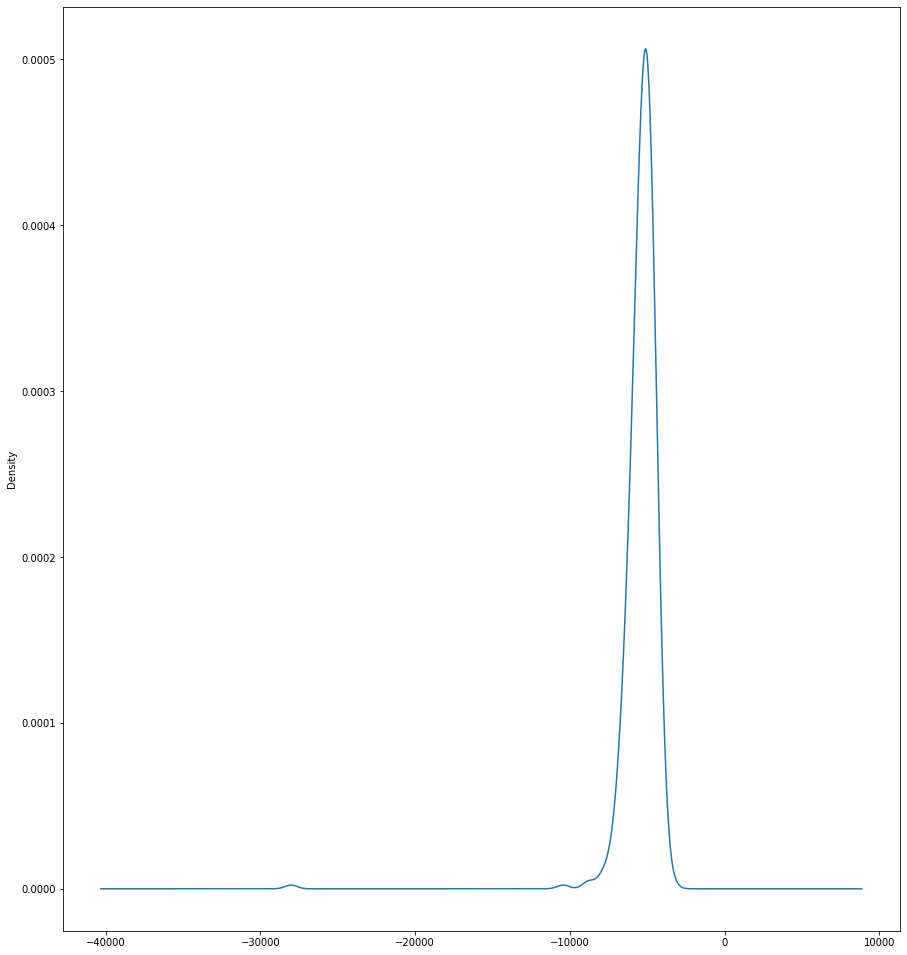

In [55]:
plt.figure(figsize=(15, 17))
data_pivott[4814].plot(kind='kde')
plt.show()